In [1]:
from PIL import Image
import numpy as np

In [2]:
THRESHOLD_CONSTANT = 4 #Number used to scale secret image to test if carry image can contain secret image
CARRY_IMAGE_FILE = "D:/Images/canyon1.png"
MESG_IMAGE_FILE = "D:/Images/hello.png"

In [3]:
#This tests each image in array format
#Provides feedback given lengths of array
#Good since dimensions doesn't really matter when hiding an image,
#   we need to know if we have enough pixels to hide the image, not necessarily
#   the dimensions
def img_cmp_arr(carry, message):

    carry_im = Image.open(carry)
    mesg_im = Image.open(message)

    carry_arr = list(carry_im.getdata())
    mesg_arr = list(mesg_im.getdata())

    carry_size = len(carry_arr)
    mesg_size = len(mesg_arr)

    if (carry_size > (THRESHOLD_CONSTANT*(mesg_size))):
        return True
    else:
        return False

In [4]:
def integer_to_binary(value):
    '''
    Convert R or G or B pixel values from integer to binary
    INPUT: An integer tuple (e.g. (220))
    OUTPUT: A string tuple (e.g. ("00101010"))
    '''
    return ('{0:08b}'.format(value))

In [5]:
def binary_to_integer(binary):
    '''
    Convert R or G or B pixel values from binary to integer.
    INPUT: A string tuple (e.g. ("00101010"))
    OUTPUT: Return an int tuple (e.g. (220))
    '''   
    return (int(binary, 2))

In [6]:
def to_array(image):   
    image_arr = np.array(image)
    shape = image_arr.shape
    flat_arr = image_arr.ravel()
    return flat_arr, shape

In [7]:
def to_image(arr, img_shape):
    matrix = np.matrix(arr)
    reform_matrix = np.asarray(matrix).reshape(img_shape)
    new_img = Image.fromarray(reform_matrix, 'RGB')
    return new_img

In [8]:
def merge_rgb(rgb1, rgb2):
    '''
    Merge two R or G or B pixels using 4 least significant bits.
    INPUT: A string tuple (e.g. ("00101010")),
           Another string tuple (e.g. ("00101010"))
    OUTPUT: An integer tuple with the two RGB values merged 00100010
    '''   
    rgb = (rgb1[:4] + rgb2[:4])
    return rgb

In [9]:
def mergeImages(carryImage_path, mesgImage_path):
    '''
    Merge two images. The msegImage will be merged into the carryImage.
    INPUT: carry and message image path
    OUTPUT: A new merged image.
    '''   
    carry_image = Image.open(carryImage_path)
    message_image = Image.open(mesgImage_path)
    
    # Ensure carry image is larger than message image
    if not img_cmp_arr(carryImage_path,mesgImage_path):
       raise ValueError('Carry image size is lower than message image size!')
    
    # Create a new image that will be outputted
    new_image = Image.new(carry_image.mode, carry_image.size)
    new_image_arr = to_array(carry_image)
    
    carry_arr = to_array(carry_image)
    mesg_arr = to_array(message_image)
    
    for i in range(len(carry_arr[0])):
        rgb1 = integer_to_binary(carry_arr[0][i])

        # Use a black pixel as default
        rgb2 = integer_to_binary((0))

        # Check if the pixel count is valid for the second image
        if i < len(mesg_arr):
            rgb2 = integer_to_binary(mesg_arr[0][i])

        # Merge the two pixels and convert it to a integer tuple
        rgb = merge_rgb(rgb1, rgb2)

        new_image_arr[0][i] = binary_to_integer(rgb)
    
    new_image = to_image(new_image_arr[0], new_image_arr[1])
    
    return new_image

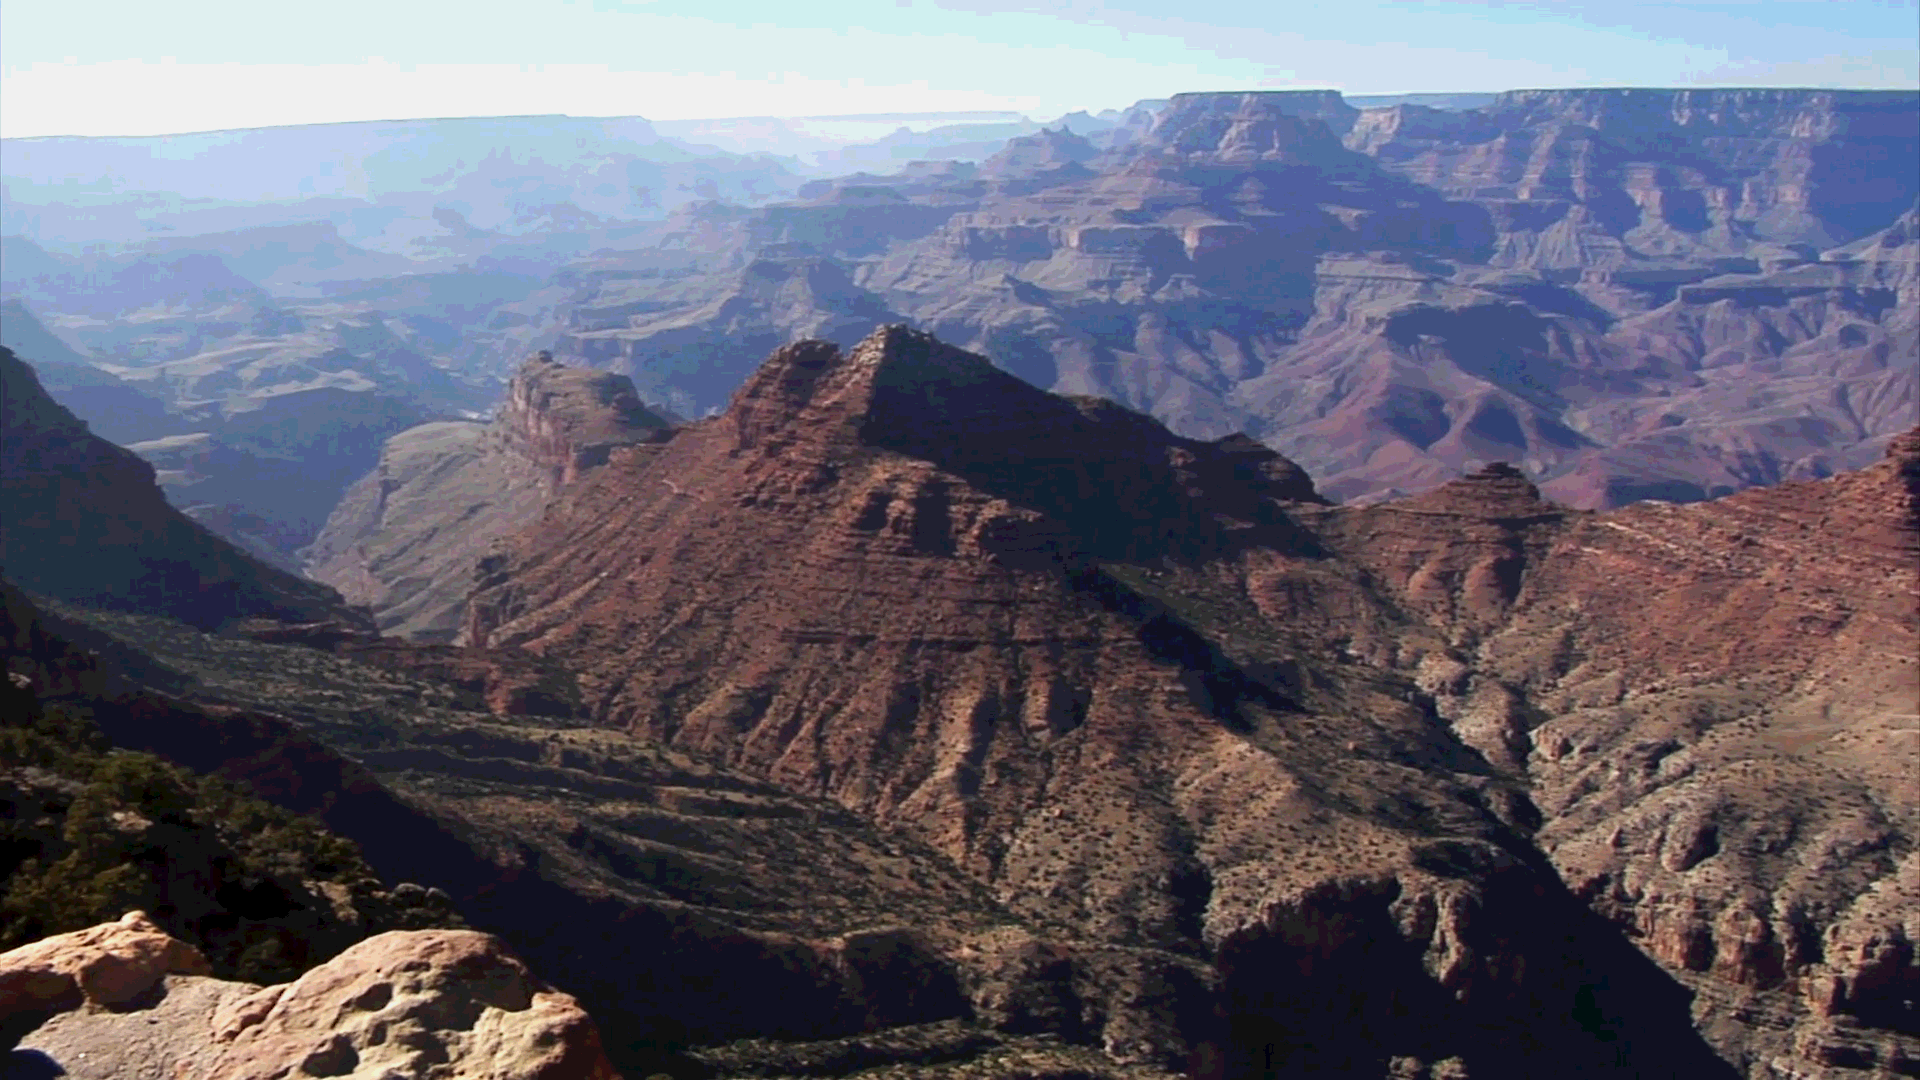

In [10]:
mergeImages(CARRY_IMAGE_FILE,MESG_IMAGE_FILE)